In [15]:
#Cell 1 – Import Libraries

In [5]:
# 1. Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import joblib
import os

# 2. Load dataset
data = pd.read_csv("02_categorical_encoded.csv")
print("Dataset shape:", data.shape)
print(data.head())

# 3. Select numeric features
numeric_features = data.select_dtypes(include=['int64', 'float64'])

# 4. Train-Test Split
train_data, test_data = train_test_split(numeric_features, test_size=0.2, random_state=42)
print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)

# 5. Scale features
scaler = StandardScaler()
scaled_train = scaler.fit_transform(train_data)
scaled_test = scaler.transform(test_data)


Dataset shape: (7043, 11)
   SeniorCitizen  tenure  MonthlyCharges  gender_Male  Dependents_Yes  \
0            0.0     1.0            25.0          0.0             0.0   
1            0.0    41.0            25.0          1.0             0.0   
2            0.0    52.0            19.0          0.0             1.0   
3            0.0     1.0            76.0          0.0             0.0   
4            0.0    67.0            51.0          1.0             0.0   

   PhoneService_Yes  MultipleLines_Yes  InternetService_Fiber optic  \
0               0.0                0.0                          0.0   
1               1.0                0.0                          0.0   
2               1.0                0.0                          0.0   
3               1.0                0.0                          0.0   
4               1.0                0.0                          1.0   

   Contract_One year  Contract_Two year  Churn_Yes  
0                0.0                0.0        1.0  
1 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import joblib


In [16]:
#– Load Data

In [7]:
data = pd.read_csv("02_categorical_encoded.csv")
print("Dataset shape:", data.shape)
data.head()


Dataset shape: (7043, 11)


,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,Contract_One year,Contract_Two year,Churn_Yes
0,0.0,1.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,41.0,25.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,52.0,19.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,76.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,67.0,51.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
#Scale Features

In [9]:
from sklearn.preprocessing import StandardScaler

# Assuming your dataset is loaded into 'data'
# Select only numeric columns for clustering
numeric_features = data.select_dtypes(include=['int64', 'float64'])

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_features)


In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

K = range(2, 11)  # Example: trying k=2 to k=10
inertia = []
silhouette_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))


In [ ]:
#Find Optimal Clusters (Elbow + Silhouette)

In [11]:
print("Scaled data shape:", scaled_data.shape)

Scaled data shape: (7043, 11)


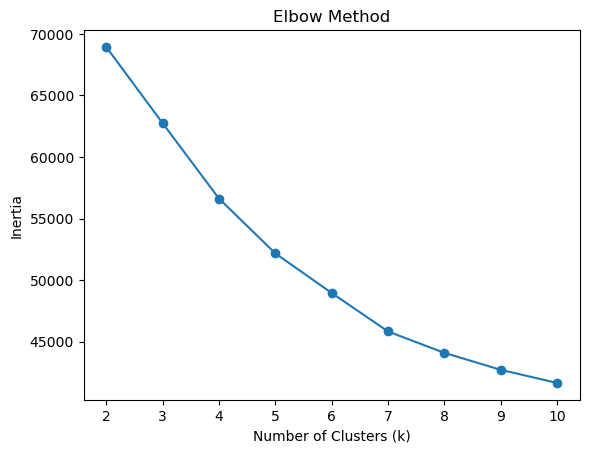

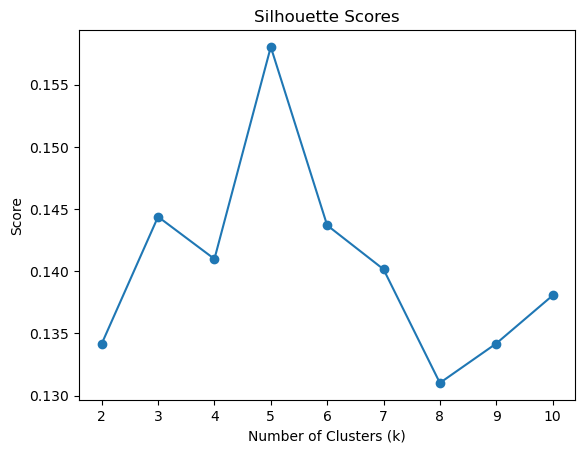

In [12]:
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# Elbow Method
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

# Silhouette Score
plt.plot(K, silhouette_scores, marker='o')
plt.title("Silhouette Scores")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Score")
plt.show()


In [ ]:
#Train Final Model

In [14]:
# Suppose we pick k=4 (decide based on the plots)
kmeans_final = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_final.fit(scaled_data)

# Save trained model
joblib.dump(kmeans_final, "kmeans_model.joblib")

# Add cluster labels to dataset
data["Cluster"] = kmeans_final.labels_
data.to_csv("clustered_dataset.csv", index=False)

print("Final model trained and saved. Clustered dataset exported.")


Final model trained and saved. Clustered dataset exported.


In [ ]:
#Visualize Clusters (First 2 Features)

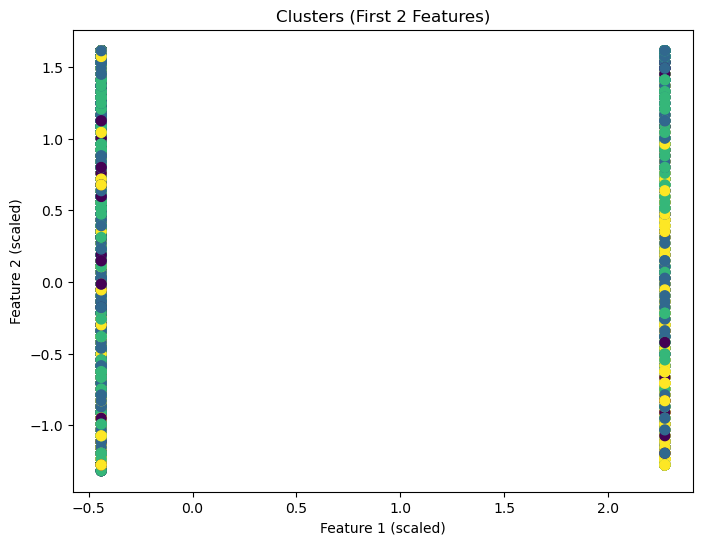

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_final.labels_, cmap="viridis", s=50)
plt.title("Clusters (First 2 Features)")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()
